### Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9834944444444444


In [8]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.01, 0.99],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.33, 0.67]])

#### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


#### KNNClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


#### No we will focus on selecting the best threshold for maximum accuracy

In [12]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9849444444444444


In [13]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.96,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,0.98,0.966929,0.538202,0.8
3,0.97,0.761539,0.509875,0.8
4,0.60,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.00,0.001147,0.441720,0.2


In [14]:
final_prediction

0      0.877762
1      0.120823
2      0.821283
3      0.760353
4      0.567447
         ...   
595    0.121340
596    0.115345
597    0.879197
598    0.160717
599    0.837357
Length: 600, dtype: float64

In [15]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91172166, 0.91172166, 0.90924686, 0.90827475, 0.81198866,
       0.8105558 , 0.80430157, 0.80412833, 0.77425879, 0.77321156,
       0.76303202, 0.76287124, 0.72157482, 0.71893711, 0.71847576,
       0.71637362, 0.65787883, 0.64993537, 0.60279968, 0.58486186,
       0.56744674, 0.55719563, 0.54792732, 0.54389283, 0.52615858,
       0.51116892, 0.4446034 , 0.37225652, 0.36379719, 0.35518074,
       0.35336612, 0.25618663, 0.25390421, 0.22619003, 0.22396893,
       0.19644743, 0.19598417, 0.12301207, 0.1228351 , 0.10548439])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
26,0.444603,0.961667
25,0.511169,0.958333
24,0.526159,0.958333
23,0.543893,0.958333
22,0.547927,0.956667


In [17]:
accuracy_ls

,thresholds,accuracy
26,0.444603,0.961667
25,0.511169,0.958333
24,0.526159,0.958333
23,0.543893,0.958333
22,0.547927,0.956667
20,0.567447,0.951667
21,0.557196,0.951667
18,0.602800,0.946667
19,0.584862,0.945000
27,0.372257,0.941667


In [18]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

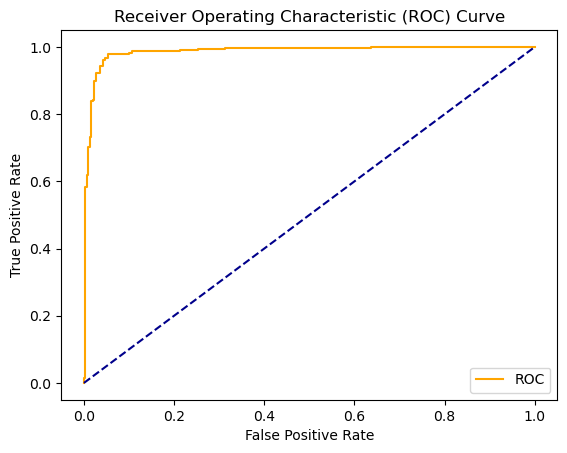

In [19]:
plot_roc_curve(fpr,tpr)